In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings

In [2]:
Data=pd.read_csv("E:/MACHINELEARNING/filedataset/diabetes.csv")
Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
x=pd.DataFrame(Data, columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]).values#خروجی را آرایه میکند-سرعت بهتر-حافظه کمتر
y=Data.Outcome.values.reshape(-1,1)
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [4]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=0)


In [5]:
k=5
clf=KNeighborsClassifier(k)
clf.fit(x_train, y_train.ravel())
y_pred=clf.predict(x_test)

In [6]:
print(metrics.accuracy_score(y_test, y_pred))

0.7489177489177489


In [7]:
k=3
clf=KNeighborsClassifier(k)
clf.fit(x_train, y_train.ravel())
y_pred=clf.predict(x_test)


In [8]:
print(metrics.accuracy_score(y_test, y_pred))

0.6926406926406926


In [9]:
k=11
clf=KNeighborsClassifier(k)
clf.fit(x_train, y_train.ravel())
y_pred=clf.predict(x_test)

In [10]:
print(metrics.accuracy_score(y_test, y_pred))

0.7532467532467533


In [11]:
k=20
Acc=np.zeros((k))
for i in range(1,k+1):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train, y_train.ravel())
    y_pred=clf.predict(x_test)
    Acc[i-1]=metrics.accuracy_score(y_test, y_pred)
Acc

array([0.61471861, 0.71428571, 0.69264069, 0.73593074, 0.74891775,
       0.74025974, 0.74891775, 0.74891775, 0.74891775, 0.75324675,
       0.75324675, 0.75324675, 0.74891775, 0.74891775, 0.75757576,
       0.74458874, 0.74458874, 0.73593074, 0.72727273, 0.72727273])

In [12]:
print(np.max(Acc))
print(np.min(Acc))

0.7575757575757576
0.6147186147186147


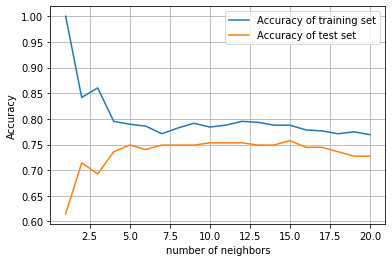

In [13]:
#راه بهتر
training_acc=[]
test_acc=[]
neighbors_setting=range(1,21)
for n_neighbors in neighbors_setting:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train.ravel())
    training_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))
plt.plot(neighbors_setting,training_acc,label="Accuracy of training set")
plt.plot(neighbors_setting, test_acc, label="Accuracy of test set")
plt.ylabel('Accuracy')
plt.xlabel("number of neighbors")
plt.grid()
plt.legend()

In [14]:
#بهبود مدل

In [15]:
from sklearn.model_selection import GridSearchCV
parameters={"n_neighbors":range(1,50)}
#علاوه بر کا از کراس ولیدیشن استفاده میکند
grid_kn=GridSearchCV(estimator=knn,
                    param_grid=parameters,# رنج کا
                    scoring="accuracy",
                    cv=5,
                    verbose=1,
                    n_jobs=-1)
grid_kn.fit(x_train, y_train.ravel())

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=20), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [16]:
grid_kn.best_params_

{'n_neighbors': 11}